<a href="https://colab.research.google.com/github/Avazbek-CNU/Mobile-Price-Predictions/blob/main/Mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Linear Regression

#Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the above features.

#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the dataset

In [3]:
df=pd.read_csv('Cellphone.csv')

In [4]:
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [5]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

## Drop the "Product_id" column

In [6]:
df = df.drop(columns=['Product_id'])

In [7]:
df

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


(10.0, 0.0)

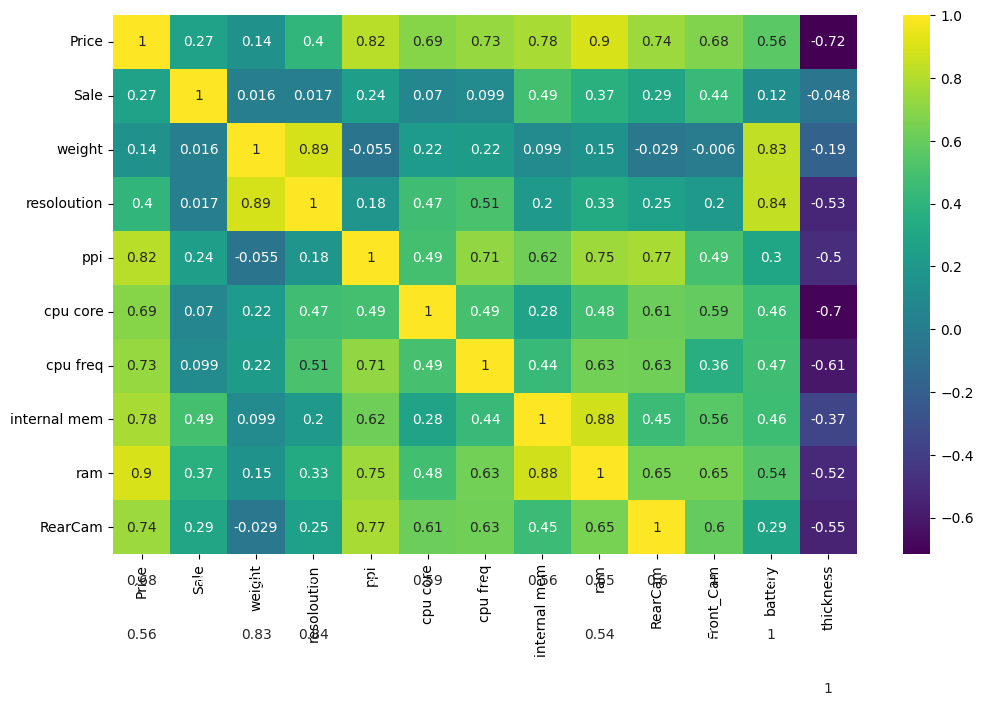

In [9]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [42]:
# dropping 'thickness', 'Sale', 'weight', 'resoloution' columns for X. because they have low correlation with Mobile Price
x = df.drop(['Price', 'thickness', 'Sale', 'weight', 'resoloution'], axis=1)
y = df['Price']


##Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

##Training the Simple Linear Regression model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor=LinearRegression()

In [35]:
regressor.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=regressor.predict(X_test)

## Actual and Predicted Values

In [37]:
differences = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)

np.set_printoptions(precision=2)
print(differences)

[[2916.62 2975.  ]
 [ 801.44  754.  ]
 [1706.56 1921.  ]
 [2334.2  2137.  ]
 [2943.91 2859.  ]
 [2506.14 2744.  ]
 [1891.86 2001.  ]
 [2815.59 2746.  ]
 [1561.46 1396.  ]
 [ 869.3   791.  ]
 [2146.59 2266.  ]
 [1790.9  1831.  ]
 [1959.6  2006.  ]
 [3292.11 3102.  ]
 [3737.51 3211.  ]
 [1354.45 1347.  ]
 [1354.45 1347.  ]
 [2525.39 2562.  ]
 [2758.26 2466.  ]
 [1641.33 1646.  ]
 [1981.8  1989.  ]
 [3499.06 3658.  ]
 [1673.78 1741.  ]
 [1406.59 1315.  ]
 [2128.07 2124.  ]
 [2616.32 2654.  ]
 [3038.65 3055.  ]
 [2815.59 2746.  ]
 [1434.79 1522.  ]
 [1891.86 2001.  ]
 [2212.27 2445.  ]
 [2357.52 1942.  ]
 [1747.69 1984.  ]]


## Calculate evaluation metrics

In [38]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

## Print the metrics

In [39]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 123.24931616790957
Mean Squared Error: 29387.26897056555
Root Mean Squared Error: 171.42715353923822
R-squared: 0.9373368024480883


#Visualizing Actual vs. Predicted Values

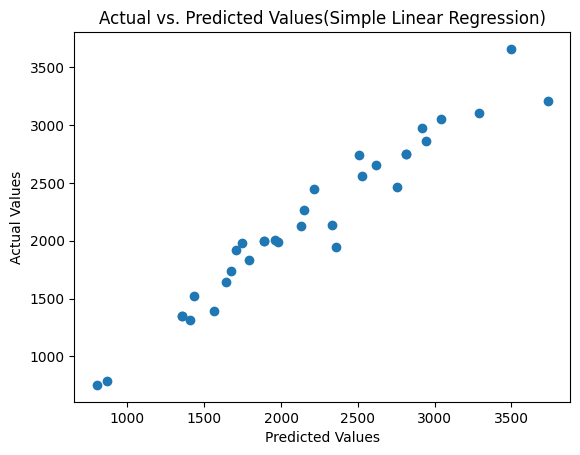

In [41]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Values(Simple Linear Regression)')
plt.show()

##Conclusion


1. **Mean Absolute Error (MAE):**
   - MAE represents the average absolute difference between the predicted values and the actual values.
   - In our case, the MAE is approximately 123.25. This means that, on average, your model's predictions have an absolute difference of about 123.25 units from the actual values.

2. **Mean Squared Error (MSE):**
   - MSE measures the average of the squared differences between the predicted and actual values.
   - Our MSE is approximately 29387.27. This value indicates that, on average, the squared difference between predictions and actual values is around 29387.27 units.

3. **Root Mean Squared Error (RMSE):**
   - RMSE is the square root of MSE and provides a more interpretable scale since it's in the same units as the original data.
   - Our RMSE is approximately 171.43. This value indicates that, on average, your model's predictions have an error of about 171.43 units from the actual values.

4. **R-squared (R2) Score:**
   - R-squared measures how well your model's predictions explain the variability of the actual values.
   - Our R2 score is approximately 0.937. This value suggests that your model explains about 93.7% of the variability in the dependent variable (the actual values) using the independent variables (the predicted values) from your model. A higher R2 score indicates a better fit, but it's important to consider the context of your data.

Overall, the metrics indicate that our model is making reasonably accurate predictions, as the MAE, MSE, and RMSE are not excessively high, and the R-squared value is relatively close to 1.